In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('credit_card_fraud_dataset.csv') 
print(df.head())

   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  


In [3]:
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())

Columns: Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')
Missing values:
 TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [4]:
df = df.drop(['TransactionID', 'TransactionDate'], axis=1)
print(df)

        Amount  MerchantID TransactionType      Location  IsFraud
0      4189.27         688          refund   San Antonio        0
1      2659.71         109          refund        Dallas        0
2       784.00         394        purchase      New York        0
3      3514.40         944        purchase  Philadelphia        0
4       369.07         475        purchase       Phoenix        0
...        ...         ...             ...           ...      ...
99995  1057.29         289          refund   San Antonio        0
99996   297.25         745          refund   San Antonio        0
99997  3448.56         690        purchase   San Antonio        0
99998  3750.79         644        purchase  Philadelphia        0
99999  1596.79         675          refund       Houston        0

[100000 rows x 5 columns]


In [5]:
for col in ['MerchantID', 'TransactionType', 'Location']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [6]:
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
print(X)
print(y)

        Amount  MerchantID  TransactionType  Location
0      4189.27         688                1         7
1      2659.71         109                1         1
2       784.00         394                0         4
3      3514.40         944                0         5
4       369.07         475                0         6
...        ...         ...              ...       ...
99995  1057.29         289                1         7
99996   297.25         745                1         7
99997  3448.56         690                0         7
99998  3750.79         644                0         5
99999  1596.79         675                1         2

[100000 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: IsFraud, Length: 100000, dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.17316072  0.64535719  0.99738342  0.87429233]
 [ 0.11274012 -1.3600847   0.99738342 -1.21174337]
 [-1.187661   -0.37295009 -1.00262344 -0.16872552]
 ...
 [ 0.65963778  0.65228445 -1.00262344  0.87429233]
 [ 0.86916923  0.49295746 -1.00262344  0.1789471 ]
 [-0.6241661   0.60033     0.99738342 -0.86407075]]


In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("X_resampled, y_resampled :",X_resampled, y_resampled )

X_resampled, y_resampled : [[ 1.17316072  0.64535719  0.99738342  0.87429233]
 [ 0.11274012 -1.3600847   0.99738342 -1.21174337]
 [-1.187661   -0.37295009 -1.00262344 -0.16872552]
 ...
 [ 1.01973455 -0.45616065  0.99738342 -0.07584069]
 [ 1.12814176 -0.85977453 -1.00262344  0.52661971]
 [ 0.3016232  -0.83926092 -1.00262344 -0.60451177]] 0         0
1         0
2         0
3         0
4         0
         ..
197995    1
197996    1
197997    1
197998    1
197999    1
Name: IsFraud, Length: 198000, dtype: int64


C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print(X_train,X_test, y_train, y_test )

[[ 0.28595038 -0.05775974 -1.00262344 -1.21174337]
 [ 1.20271545 -1.03103983 -1.00262344 -1.21174337]
 [-1.37852389 -1.38106257  0.99738342 -0.47558076]
 ...
 [-0.67640671  1.36760966 -1.00262344 -1.55941598]
 [-1.48886716 -1.2676558   0.99738342  1.22196494]
 [ 0.24516334  1.69615142  0.99738342 -1.40356564]] [[ 0.9386567   0.8077018  -1.00262344 -1.42338885]
 [ 1.39627362  1.49394659 -1.00262344  0.87429233]
 [-0.52956907  0.16698718 -1.00262344 -0.01234194]
 ...
 [ 1.0179828   1.17529261  0.99738342  1.22196494]
 [ 0.65163034 -1.38433011 -1.00262344 -0.16872552]
 [-0.24032207  0.09463999 -1.00262344 -0.86407075]] 91462     0
452       0
188028    1
58411     0
135418    1
         ..
119879    1
103694    1
131932    1
146867    1
121958    1
Name: IsFraud, Length: 138600, dtype: int64 181950    1
64423     1
160393    1
23579     0
146018    1
         ..
166075    1
98363     0
76550     0
31224     0
14161     0
Name: IsFraud, Length: 59400, dtype: int64


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [25]:
rf_pred = rf.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
print("rf_pred:",rf_pred)
print("xgb_pred:",xgb_pred)

rf_pred: [1 1 1 ... 0 0 1]
xgb_pred: [1 1 1 ... 0 0 0]


In [22]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest:
Accuracy: 0.9363804713804714
ROC AUC: 0.9362629365241952
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     29513
           1       0.92      0.95      0.94     29887

    accuracy                           0.94     59400
   macro avg       0.94      0.94      0.94     59400
weighted avg       0.94      0.94      0.94     59400



In [21]:
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


XGBoost:
Accuracy: 0.8365319865319866
ROC AUC: 0.8368390611220266
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     29513
           1       0.87      0.79      0.83     29887

    accuracy                           0.84     59400
   macro avg       0.84      0.84      0.84     59400
weighted avg       0.84      0.84      0.84     59400



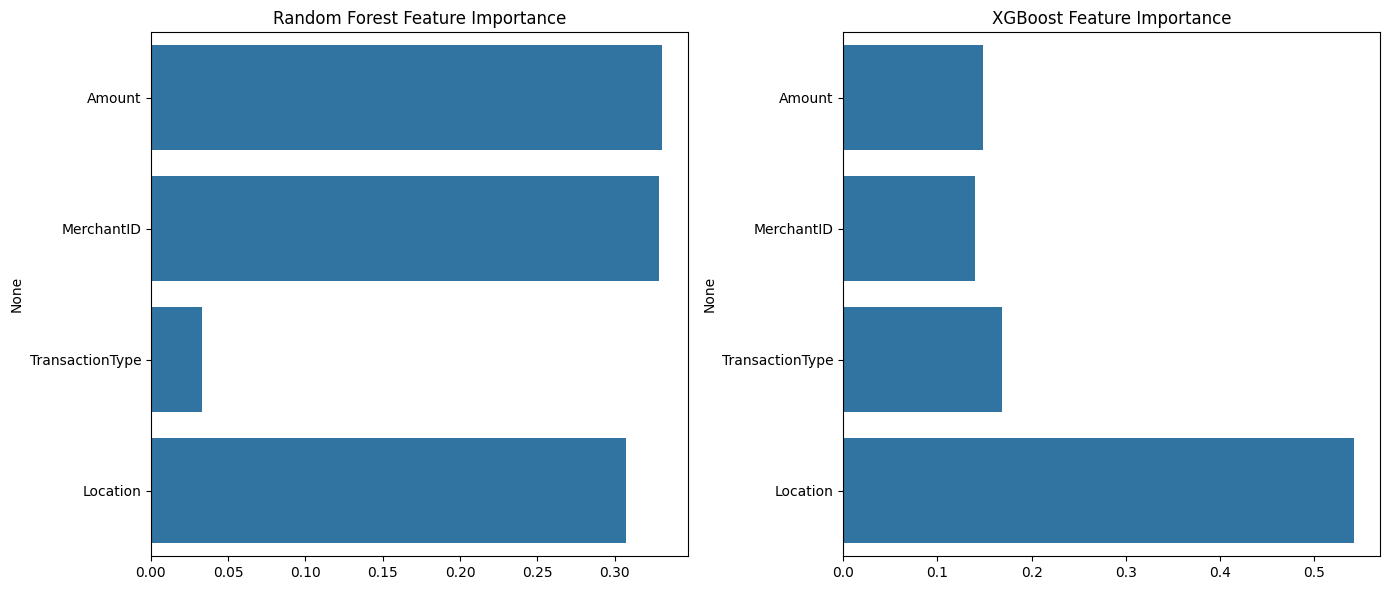

In [29]:
features = X.columns
rf_importance = rf.feature_importances_
xgb_importance = xgb_model.feature_importances_

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=rf_importance, y=features, ax=axes[0])
axes[0].set_title('Random Forest Feature Importance')
sns.barplot(x=xgb_importance, y=features, ax=axes[1])
axes[1].set_title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()